**The intention of this program is to calculate the estimated selling price of a used vehicle, given the following inputs: make, model, trim, year, mileage, and whether the vehicle is used or certified by the manufacturer.**
<br><br>
We will do this by training a linear regression model using a subdataset that consists of cars of the same make, model, and trim that the user inputted. The reason why we do not train the model using the entire dataset is because the price of a used vehicle depends not only on its year or mileage (which are continuous numerical), but also its brand, model, and trim, which are non-numerical. To highlight this fact, let's take a used Toyota and a used BMW car as an example. Even if both cars are manufactured in the same year and have the same mileage, its price will still differ significantly, as Toyota is considered an affordable brand and BMW a luxury brand. Thus this program will train models using subdatasets, since data of Toyota cars, and every other non-BMW car, should not be included in the calculation of the price of a BMW car.
<br><br>
The same idea applies to a car's model and trim. This is why our subdataset will consist of all cars that have the same make, model, and trim as the user inputted. For each new input from the user, a new subdataset and model is created.
<br><br>
Let's take a look at the code:

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from scipy.stats import norm
from myutils import remove_nonnumeric

In [510]:
url = "data/cars-dataset1.csv"
df = pd.read_csv(url)

In [511]:
df.head()

,Car Names,Mileages,Ratings,Reviews,used/certified,Price
0,2019 Honda Accord Sport,Mileage,3.7,(3 reviews),Used,"$27,995.00"
1,2015 Chevrolet Corvette Stingray Z51,"29,192 mi.",3.7,(3 reviews),Used,"$52,000.00"
2,2020 Jeep Grand Cherokee Overland,"53,561 mi.",4.8,"(1,147 reviews)",Used,"$41,998.00"
3,2019 Audi A7 3.0T Prestige,"46,664 mi.",4.9,"(1,831 reviews)",Used,"$62,750.00"
4,2017 Ford Mustang GT Premium,"21,726 mi.",4.0,(409 reviews),Used,"$29,995.00"


Looking at the first 5 rows of the dataset, we see a "Ratings" and "Reviews" column. They are ratings and reviews for the dealership that sells the car, not the car itself. Since this program is for people who would like to know an estimated market price of their used car (rather then the price a particular dealership would offer), the dealership's rating and number of reviews are irrelevant features. Thus, we will remove these two columns. <br><br>
More info about this dataset: https://www.kaggle.com/datasets/ayazlakho/carsdataset

In [512]:
# initialize features for subdataset
new_df = {}
names = ['name', 'year', 'mileage', 'used/cert', 'price']

for name in names:
    new_df[name] = []
    
# filter data and put into new data file (new_df)
for sample in df.values:
    
    # Ignore rows that have Mileage = 'Mileage' or Price = 'Not Priced'
    if sample[1] == 'Mileage' or sample[5] == 'Not Priced':
        continue
    
    new_df['name'].append(sample[0][5:].lower())
    new_df['year'].append(int(sample[0][0:4]))
    new_df['mileage'].append(int(remove_nonnumeric(sample[1])))

    # used -> 0 ; certified -> 1
    if sample[4] == 'Used':
        new_df['used/cert'].append(0)
    else:
        new_df['used/cert'].append(1)

    new_df['price'].append(int(remove_nonnumeric(sample[5][:-3])))

In [513]:
# A look at the new, cleaned dataset
df = pd.DataFrame(new_df)
df.to_csv()
df

,name,year,mileage,used/cert,price
0,chevrolet corvette stingray z51,2015,29192,0,52000
1,jeep grand cherokee overland,2020,53561,0,41998
2,audi a7 3.0t prestige,2019,46664,0,62750
3,ford mustang gt premium,2017,21726,0,29995
4,jeep grand cherokee limited,2016,66514,0,26499
...,...,...,...,...,...
9123,lexus is 300 base,2019,61106,0,36500
9124,kia sorento l,2019,11132,0,23450
9125,gmc acadia denali,2017,55074,0,29381
9126,honda pilot elite,2019,57150,1,38488


Let's have a look at the mileage vs. price scatter plot for all cars in the dataset.

(0.0, 300000.0)

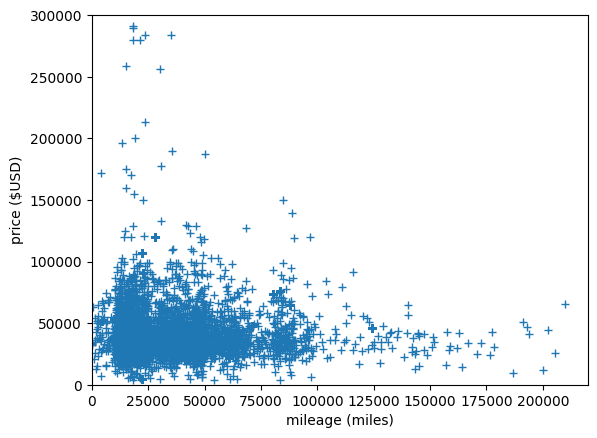

In [514]:
X = df['mileage'].tolist()
y = df['price'].tolist()
plt.plot(X, y, marker='+', linestyle='')
plt.xlabel('mileage (miles)')
plt.ylabel('price ($USD)')
plt.xlim(0, 220_000)
plt.ylim(0, 300_000)

In [499]:
# sample car input from user
make_in = "Honda"
model_in = "Pilot"
trim_in = "EX-L"

Given the sample make, model, and trim input above, we will find the subdataset for this input.

In [515]:
# Get subdataset of that car (all cars with the same make, model, trim)
user_input = " ".join([make_in, model_in, trim_in]).lower()
count = 0

X_train = np.empty((0,3)) # empty 2D array with 0 rows, 3 columns
y_train = np.array([])    # empty 1D array with 0 elements

for sample in df.values:
    if user_input in sample[0]:
        X_train = np.vstack((X_train, sample[1:4]))
        y_train = np.append(y_train, sample[4])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (44, 3)
y_train shape: (44,)


Text(0.5, 0.98, 'Feature(s) vs. Target')

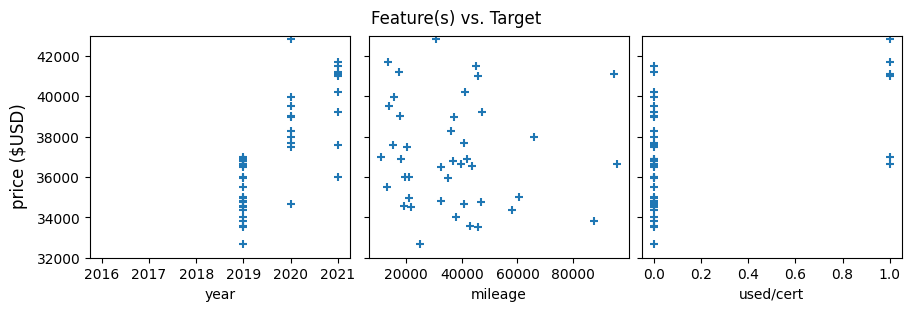

In [516]:
# Plot subdataset for sample input: Honda Pilot EX-L
fig, axs = plt.subplots(1, 3, layout='constrained', sharey=True, figsize=(9,3))

for i in range(len(axs)):
    axs[i].scatter(X_train[:,i], y_train, marker='+')
    axs[i].set_xlabel(names[1+i])
    axs[i].set_ylim([32000, 43000])
fig.supylabel('price ($USD)')
fig.suptitle('Feature(s) vs. Target')

Notice that the range of values vary greatly between each feature. Feature scaling is necessary.<br>
Decided to use **RobustScaler** to reduce outlier influence. Outliers are very common in this dataset. <br>Some outliers are not visible on the graph because I used a y-limiter.<br><br>
Info about sklearn scalers:
https://docs.google.com/spreadsheets/d/1woVi7wq13628HJ-tN6ApaRGVZ85OdmHsDBKLAf5ylaQ/edit?usp=sharing

[[ 0.          2.5007995   0.        ]
 [ 1.          0.22049631  0.        ]
 [ 1.          1.26865331  0.        ]
 [ 1.         -0.73915481  0.        ]]


Text(0.5, 0.98, 'Normal distribution of scaled features')

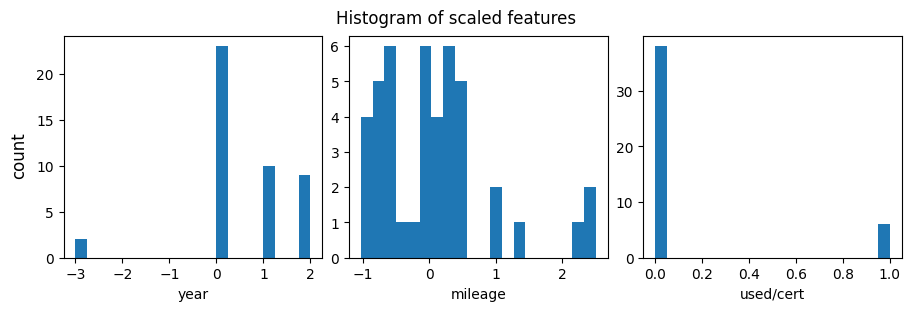

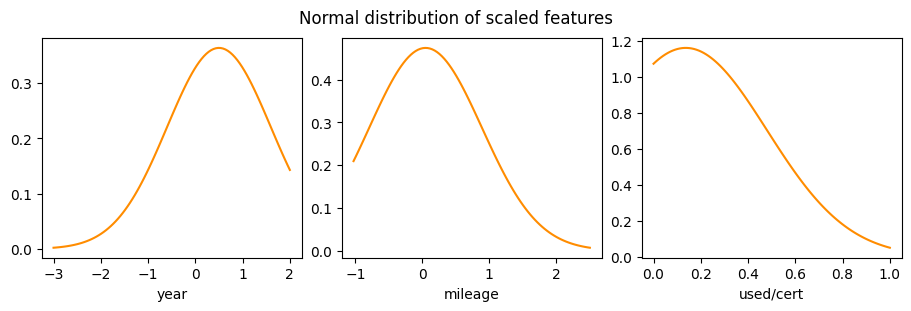

In [517]:
# Scale data
scaler = preprocessing.RobustScaler()
scaled_X_train = scaler.fit_transform(X_train)
print(scaled_X_train[0:4])

fig1, axs1 = plt.subplots(1, 3, layout='constrained', figsize=(9,3))
fig2, axs2 = plt.subplots(1, 3, layout='constrained', figsize=(9,3))

# Visualize the scaled data
for i in range(len(axs)):
    
    # plot histogram
    axs1[i].hist(scaled_X_train[:,i], bins=20)
    axs1[i].set_xlabel(names[1+i])
    
    # plot normal distribution curve
    mu, std = norm.fit(scaled_X_train[:,i])
    x = np.linspace(min(scaled_X_train[:,i]), max(scaled_X_train[:,i]), 100)
    p = norm.pdf(x, mu, std)
    axs2[i].plot(x, p, color='darkorange')
    axs2[i].set_xlabel(names[1+i])
    
fig1.suptitle("Histogram of scaled features")
fig1.supylabel("count")
fig2.suptitle("Normal distribution of scaled features")

We can see that the features have been scaled, and the range of the scaled data is centered around zero and roughly +/- 2. This would allow gradient descent to converge much faster and improve the accuracy of our machine learning model.<br>
Furthermore, comparing the histograms and its corresponding normal distribution curve, we can see that outlier influence is reduced.

In [518]:
# create a multivariate linear regression model
model = linear_model.LinearRegression()
model.fit(scaled_X_train, y_train)

LinearRegression()

To predict the price of a car, we need these inputs:
- Make (string)
- Model (string)
- Trim (string)
- Year (int)
- Mileage (int)
- Used/Certified (int)<br>

We already have these inputs from the user:
- Make = "Honda"
- Model = "Pilot"
- Trim = "EX-L"

and we already have a model trained using a sub-dataset of this particular car. Now we need three more inputs from the user: Year, Mileage, and Used/Certified.

In [504]:
# sample input from user
year_in = 2018
mileage_in = 34900
usedcert_in = 0

user_input = np.array([year_in, mileage_in, usedcert_in]).reshape(1,3) # 1 by 3 array

Before we predict the price, we need to scale the user input because the model was trained using scaled data.

In [505]:
# scale user input (with RobustScaler initialized previously)
scaled_user_input = scaler.transform(user_input)
scaled_user_input

array([[-1.        , -0.02579171,  0.        ]])

Now that we have out scaled user_input, we can now predict the price of a **used 2018 Honda Pilot EX-L with 34900 miles**.

In [507]:
pred = model.predict(scaled_user_input)
print(pred)
print(f"Predicted price: ${round(pred[0])}")

[32137.4585113]
Predicted price: $32137


**The estimated selling price of a used 2018 Honda Pilot EX-L with 34900 miles is <u>$32137</u>.**